In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Advertising-analysis.csv')
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

model = LinearRegression()
model.fit(X, y)

print("Regression Equation:")
print(f"Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * TV + {model.coef_[1]:.2f} * Radio + {model.coef_[2]:.2f} * Newspaper")

Regression Equation:
Sales = 2.94 + 0.05 * TV + 0.19 * Radio + -0.00 * Newspaper


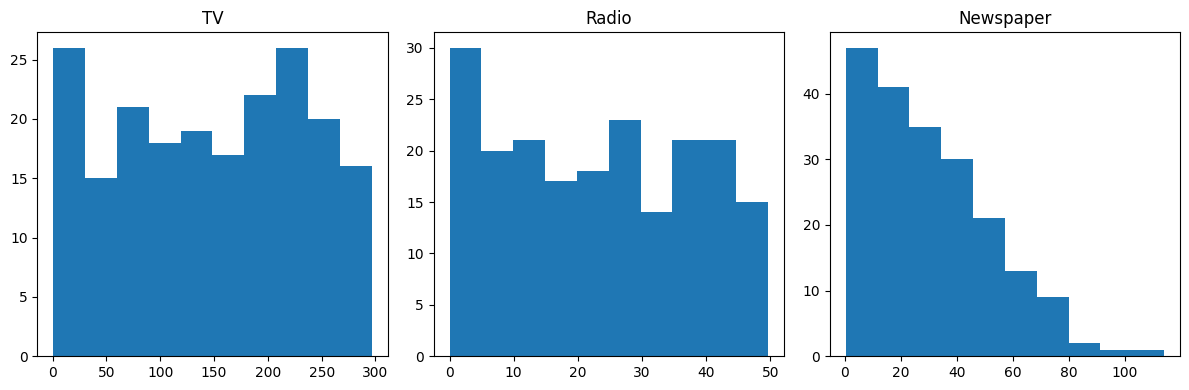

Shapiro-Wilk Test for Normality:
TV: ShapiroResult(statistic=0.9495095014572144, pvalue=1.6927443766689976e-06)
Radio: ShapiroResult(statistic=0.9440046548843384, pvalue=5.196940833229746e-07)
Newspaper: ShapiroResult(statistic=0.9364001750946045, pvalue=1.1272610578316744e-07)


In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(data['TV'])
axs[0].set_title('TV')
axs[1].hist(data['radio'])
axs[1].set_title('Radio')
axs[2].hist(data['newspaper'])
axs[2].set_title('Newspaper')
plt.tight_layout()
plt.show()

print("Shapiro-Wilk Test for Normality:")
print(f"TV: {stats.shapiro(data['TV'])}")
print(f"Radio: {stats.shapiro(data['radio'])}")
print(f"Newspaper: {stats.shapiro(data['newspaper'])}")

In [9]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

y_pred = model.predict(X)
residuals = y - y_pred

X_with_constant = sm.add_constant(X)
_, p_value, _, _ = het_breuschpagan(residuals, X_with_constant)
print(f"\nBreusch-Pagan Test for Homoscedasticity:")
print(f"p-value: {p_value}")

# p-value of 0.1623, fail to reject the null hypothesis of homoscedasticity at the 0.05 significance level


Breusch-Pagan Test for Homoscedasticity:
p-value: 0.16232215845413125


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(f"TV: {vif[0]:.2f}")
print(f"Radio: {vif[1]:.2f}")
print(f"Newspaper: {vif[2]:.2f}")

#VIF = 1: No multicollinearity
#VIF between 1 and 5: Moderate multicollinearity
#VIF > 5: High multicollinearity

#TV, Newspaper, and Radio have VIF values less than 5, so they have moderate multicollinearity 


Variance Inflation Factors (VIF):
TV: 2.49
Radio: 3.29
Newspaper: 3.06


In [12]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
print("\nRidge Regression Coefficients:")
print(f"Intercept: {ridge_model.intercept_:.2f}")
print(f"TV: {ridge_model.coef_[0]:.2f}")
print(f"Radio: {ridge_model.coef_[1]:.2f}")
print(f"Newspaper: {ridge_model.coef_[2]:.2f}")


Ridge Regression Coefficients:
Intercept: 2.94
TV: 0.05
Radio: 0.19
Newspaper: -0.00


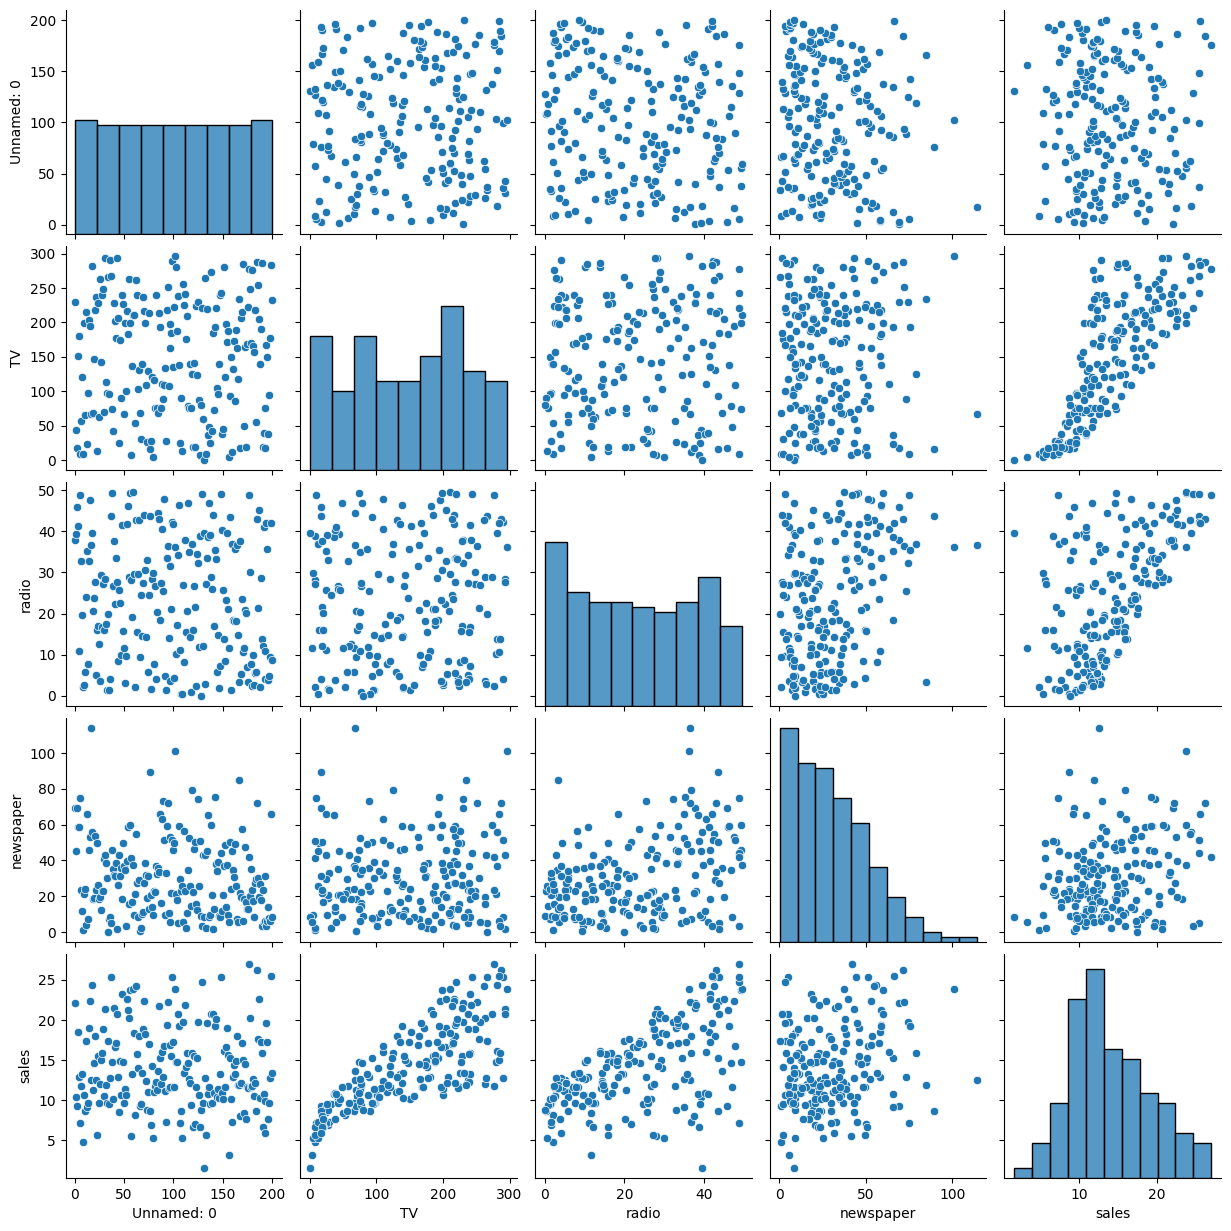

In [6]:
import seaborn as sns

sns.pairplot(data)
plt.show()

In [18]:
from sklearn.metrics import r2_score
from scipy import stats

y_pred = model.predict(X)
sst = ((y - y.mean())**2).sum()
sse = ((y - y_pred)**2).sum()
r2 = r2_score(y, y_pred)

print(f"\nSST: {sst:.2f}")
print(f"SSE: {sse:.2f}")
print(f"R^2: {r2:.2f}")

f_stat, p_value = stats.f_oneway(y, y_pred)
print("\nANOVA Table:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


SST: 5417.15
SSE: 556.83
R^2: 0.90

ANOVA Table:
F-statistic: 0.00
p-value: 1.0000


In [17]:
#The R^2 value of 0.9 indicates that the model explains 90% of the variance in the sales. 
#Don't know how to interpret the p-value of the ANOVA test

In [19]:
import statsmodels.api as sm

X_with_constant = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_constant).fit()
print("\n95% Confidence Intervals for Features:")
print(model_sm.conf_int(alpha=0.05))

#The confidence intervals for TV and Radio do not include zero --> significant predictors. 
# The confidence interval for Newspaper includes zero, it is not a significant predictor.


95% Confidence Intervals for Features:
                  0         1
const      2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541


In [21]:
new_data = pd.DataFrame({'const': [1], 'TV': [100], 'radio': [20], 'newspaper': [30]})
predicted_sales = model_sm.predict(new_data)
print(f"\nPredicted Sales for New Data Point: {predicted_sales[0]:.2f}")

conf_int = model_sm.get_prediction(new_data).summary_frame(alpha=0.05)
print(f"95% Confidence Interval for Fitted Value: [{conf_int['mean_ci_lower'][0]:.2f}, {conf_int['mean_ci_upper'][0]:.2f}]")


Predicted Sales for New Data Point: 11.25
95% Confidence Interval for Fitted Value: [10.98, 11.53]


In [24]:
new_data = pd.DataFrame({'const': [1], 'TV': [100], 'radio': [20], 'newspaper': [30]})
X_new_with_constant = new_data[['const', 'TV', 'radio', 'newspaper']]

pred_int = model_sm.get_prediction(X_new_with_constant).summary_frame(alpha=0.05)
print(f"\n95% Prediction Interval for New Observation: [{pred_int['obs_ci_lower'][0]:.2f}, {pred_int['obs_ci_upper'][0]:.2f}]")


95% Prediction Interval for New Observation: [7.92, 14.59]


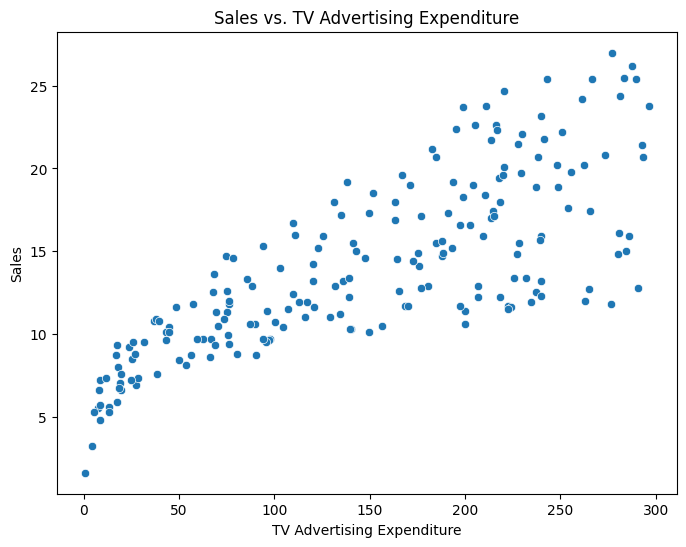

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TV', y='sales')
plt.title('Sales vs. TV Advertising Expenditure')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

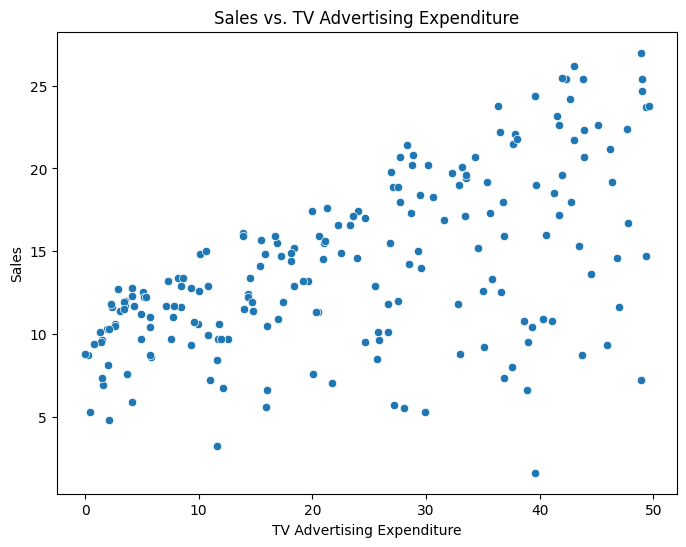

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='radio', y='sales')
plt.title('Sales vs. TV Advertising Expenditure')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

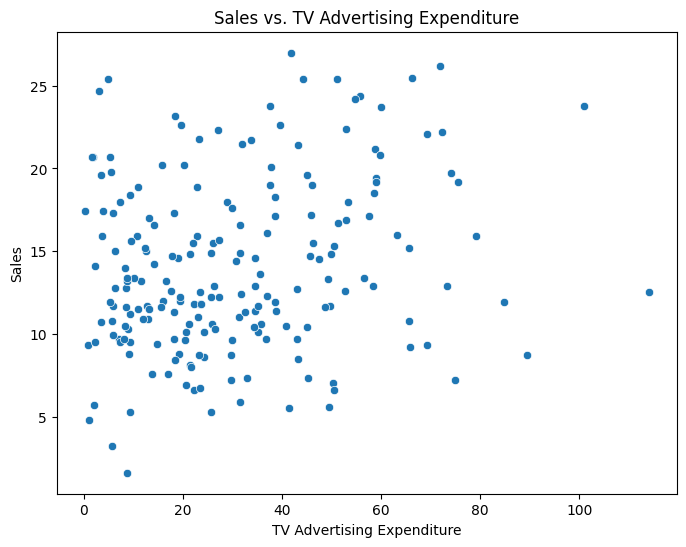

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='newspaper', y='sales')
plt.title('Sales vs. TV Advertising Expenditure')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

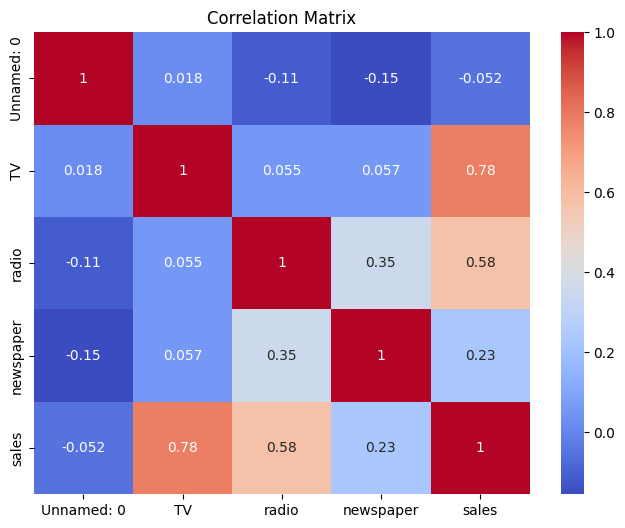

In [30]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

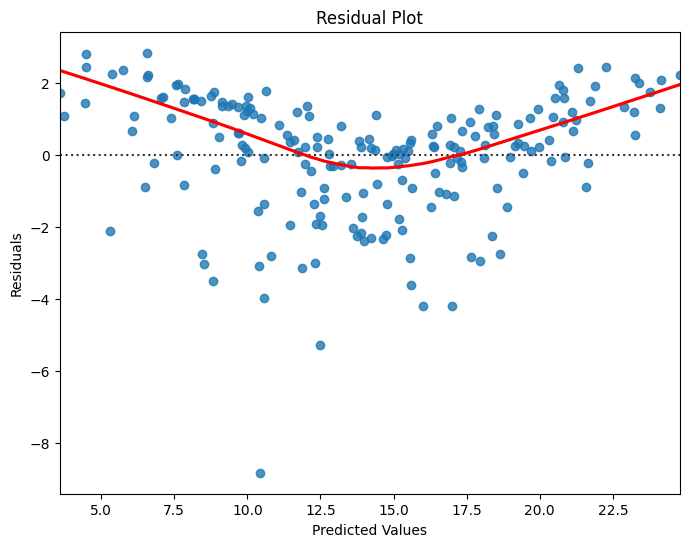

In [31]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

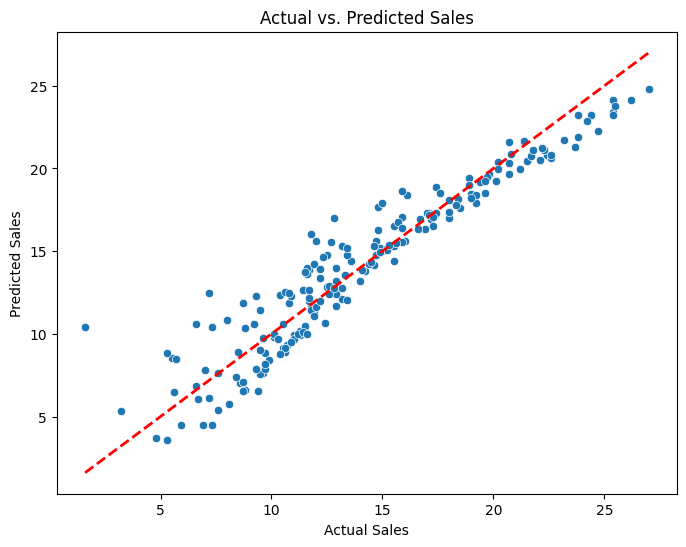

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.show()

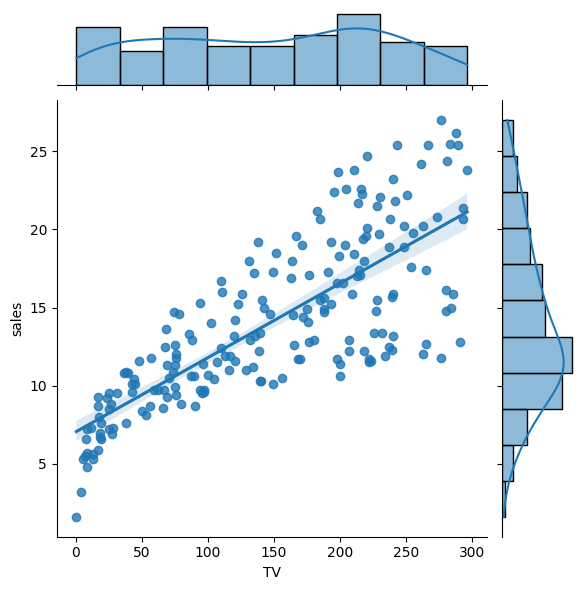

In [35]:
sns.jointplot(data=data, x='TV', y='sales', kind='reg')
plt.show()

/Users/tommyly/mambaforge/envs/eks/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:1199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  focus_val = results.params[focus_col] * model.exog[:, focus_col]


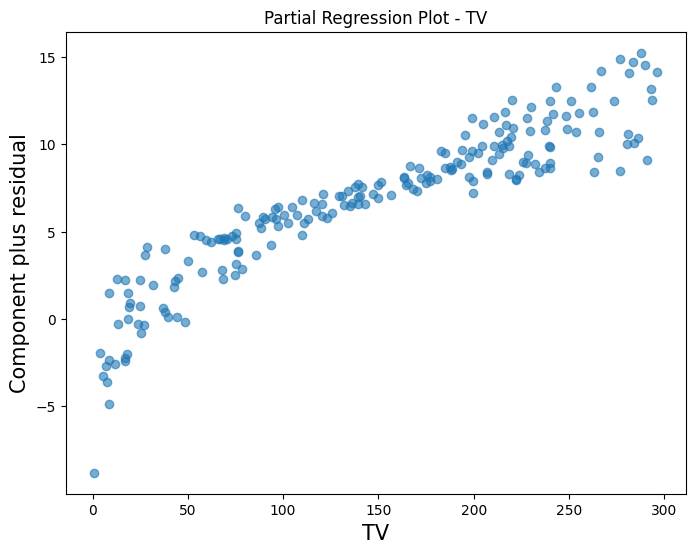

In [36]:
from statsmodels.graphics.regressionplots import plot_partial_residuals

fig, ax = plt.subplots(figsize=(8, 6))
plot_partial_residuals(model_sm, 'TV', ax=ax)
plt.title('Partial Regression Plot - TV')
plt.show()

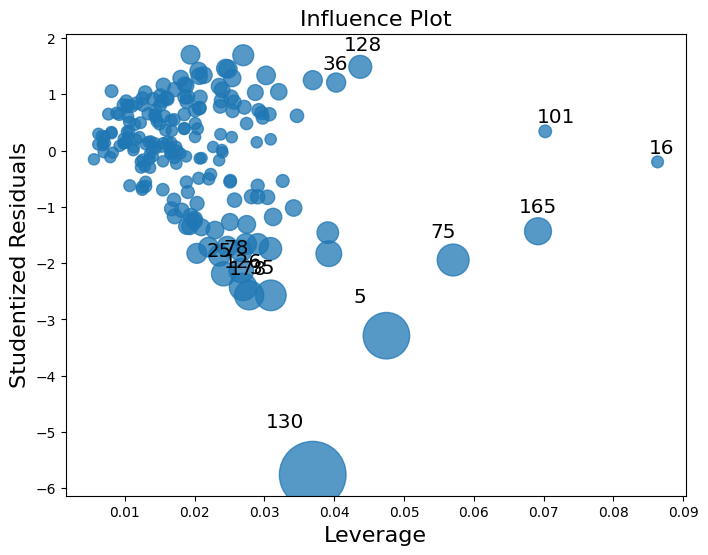

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model_sm, ax=ax)
plt.show()

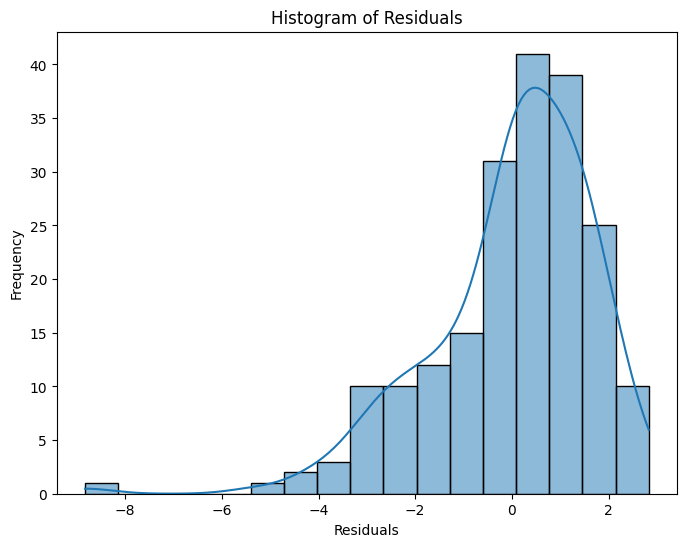

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#@Tommy: seems normal to me, but let's check for residual graph

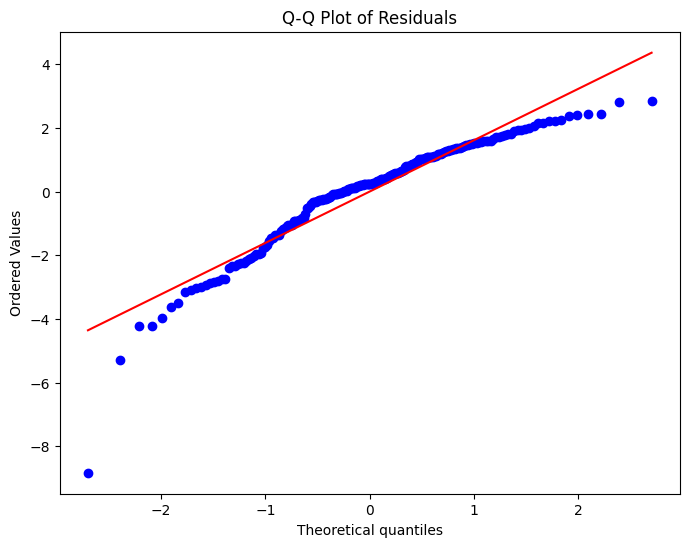

In [18]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, plot=ax)
ax.set_title('Q-Q Plot of Residuals')
plt.show()
#Tommy: the points in the Q-Q plot should fall close to the diagonal lin --> the residuals (the error terms) is normally distributed

In [14]:
from scipy.stats import shapiro

_, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value:.12f}")
# Tommy: p-value is smaller than 0.05 at 0.000000003938, accept the null hypothesis that the  residuals are normally distributed

Shapiro-Wilk test p-value: 0.000000003938


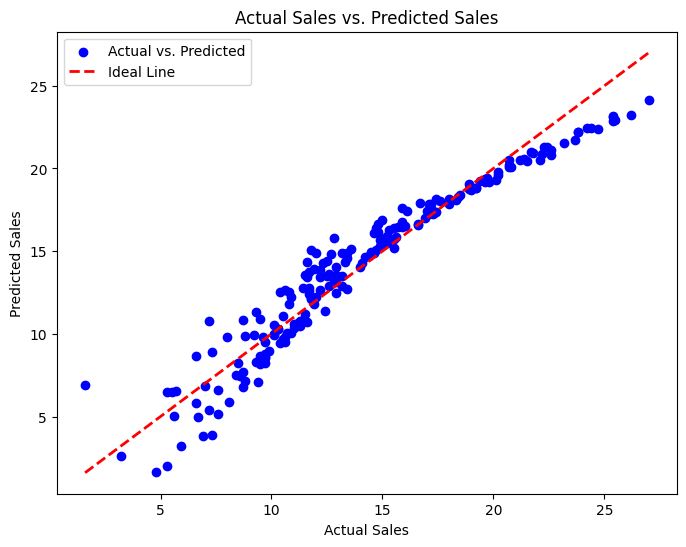

R-squared: 0.9289549053811125


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
data = pd.read_csv('Advertising-analysis.csv')
data['TV_sqrt'] = np.sqrt(data['TV'])
X = data[['TV_sqrt', 'radio', 'newspaper']]
y = data['sales']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Line')
plt.title('Actual Sales vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

# Calculate R-squared
r_squared = model.score(X, y)
print("R-squared:", r_squared)